## Лабораторая работа 6

**Задача:** Подготовить данные для факторного анализа


### Введение 

#### Основные понятия

**Факторный анализ** - это статистический метод, используемый для описания изменчивости среди наблюдаемых, коррелированных переменных в терминах меньшего числа ненаблюдаемых переменных, называемых факторами.

**Факторная нагрузка** — это коэффициент, который показывает степень влияния
скрытого (латентного) фактора на наблюдаемую переменную.


Факторный анализ строится на предположении, что наблюдаемые переменные могут быть представлены как линейная комбинация скрытых факторов и уникальных (специфичных для каждой переменной) факторов.


**Общность переменной** определяется как доля вариации, объяснённая
скрытыми факторами. Она может быть рассчитана как сумма квадратов
факторных нагрузок, связанных с данной переменной. 


**Латентные переменные** - факторы в модели факторного анализа являются латентными переменными,
которые не измеряются напрямую. Они рассчитываются на основе
наблюдаемых переменных.

<img src="image.png" alt="Альтернативный текст" />



**Основные цели:**
1. Сокращение данных
2. Структурное обнаружение
3. Классификация переменных

**Задачи факторного анализа:**
1. Определение набора факторов, объясняющих взаимосвязи между
наблюдаемыми переменными.
2. Оценка силы связи каждой переменной с каждым фактором (факторные
нагрузки).
3. Интерпретация выявленных факторов.
4. Оценка доли дисперсии каждой переменной, объясняемой факторам

### Описание датасета "Predict Online Gaming Behavior Dataset"
Этот набор данных фиксирует комплексные метрики и демографию, связанные с поведением игроков в онлайн-игровых средах. Он включает такие переменные, как демография игроков, детали, характерные для игры, метрики вовлеченности и целевую переменную, отражающую удержание игроков.


| **Переменная** | **Описание** |
|----------------|--------------|
| **PlayerID**   | Уникальный идентификатор для каждого игрока. |
| **Age**        | Возраст игрока. |
| **Gender**     | Пол игрока. |
| **Location**   | Географическое местоположение игрока. |
| **GameGenre**  | Жанр игры, в которой участвует игрок. |
| **PlayTimeHours** | Среднее количество часов, проведенных за игрой за одну сессию. |
| **InGamePurchases** | Признак того, делает ли игрок внутриигровые покупки (0 — Нет, 1 — Да). |
| **GameDifficulty** | Уровень сложности игры. |
| **SessionsPerWeek** | Количество игровых сессий в неделю. |
| **AvgSessionDurationMinutes** | Средняя продолжительность каждой игровой сессии в минутах. |
| **PlayerLevel** | Текущий уровень игрока в игре. |
| **AchievementsUnlocked** | Количество достижений, разблокированных игроком. |
| **EngagementLevel** | Категоризированный уровень вовлеченности, отражающий удержание игроков ('Высокий', 'Средний', 'Низкий'). |


Целевая переменная — EngagementLevel — указывает на уровень вовлеченности игрока и категоризируется как 'Высокий', 'Средний' или 'Низкий'.

### Проверка применимости факторного анализа к данным

**Основные критерии и тесты:**

1. Корреляционная матрица

2. Мера адекватности выборки Кайзера-Мейера-Олкина (KMO)

3. Тест сферичности Бартлетта

4. Размер выборки

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from scipy.stats import bartlett

In [50]:
df = pd.read_csv('../online_gaming_behavior_dataset.csv')
engagement_map = {'Low': 0, 'Medium': 1, 'High': 2}
difficult_map = {'Easy': 0, 'Medium': 1, 'Hard': 2}
df['EngagementLevel'] = df['EngagementLevel'].map(engagement_map)
df['GameDifficulty'] = df['GameDifficulty'].map(difficult_map)

columns_to_use = ["Age", "PlayTimeHours", "InGamePurchases", "SessionsPerWeek", "AvgSessionDurationMinutes", "PlayerLevel", "AchievementsUnlocked", "GameDifficulty", "EngagementLevel"]
data = df[columns_to_use].dropna()

In [51]:
data.head(3)

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,GameDifficulty,EngagementLevel
0,43,16.271119,0,6,108,79,25,1,1
1,29,5.525961,0,5,144,11,10,1,1
2,22,8.223755,0,16,142,35,41,0,2


#### Корреляционная матрица

**Описание:** корреляционная матрица показывает взаимосвязи между
переменными. Для успешного применения факторного анализа должны
существовать значимые корреляции между переменными.


**Анализ корреляций:** желательно наличие высоких корреляций
(например, выше 0,3), что указывает на возможность объединения
переменных в факторы. Отсутствие корреляций или их слабая
выраженность могут свидетельствовать о том, что выбранные переменные
не подходят для факторного анализа.


Корреляционная матрица:


,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,GameDifficulty,EngagementLevel
Age,1.000000,0.002462,-0.000186,0.008777,-0.002269,0.001353,-0.001100,-0.002760,0.000824
PlayTimeHours,0.002462,1.000000,-0.006067,-0.003655,-0.001925,-0.005152,0.003913,0.001636,-0.001849
InGamePurchases,-0.000186,-0.006067,1.000000,0.005132,-0.003059,0.006524,0.000098,0.001410,0.008209
SessionsPerWeek,0.008777,-0.003655,0.005132,1.000000,-0.000620,0.003257,0.003187,0.005058,0.605996
AvgSessionDurationMinutes,-0.002269,-0.001925,-0.003059,-0.000620,1.000000,0.001368,-0.002227,0.002374,0.476698
PlayerLevel,0.001353,-0.005152,0.006524,0.003257,0.001368,1.000000,0.006343,0.006059,0.059315
AchievementsUnlocked,-0.001100,0.003913,0.000098,0.003187,-0.002227,0.006343,1.000000,-0.006244,0.060576
GameDifficulty,-0.002760,0.001636,0.001410,0.005058,0.002374,0.006059,-0.006244,1.000000,0.005057
EngagementLevel,0.000824,-0.001849,0.008209,0.605996,0.476698,0.059315,0.060576,0.005057,1.000000


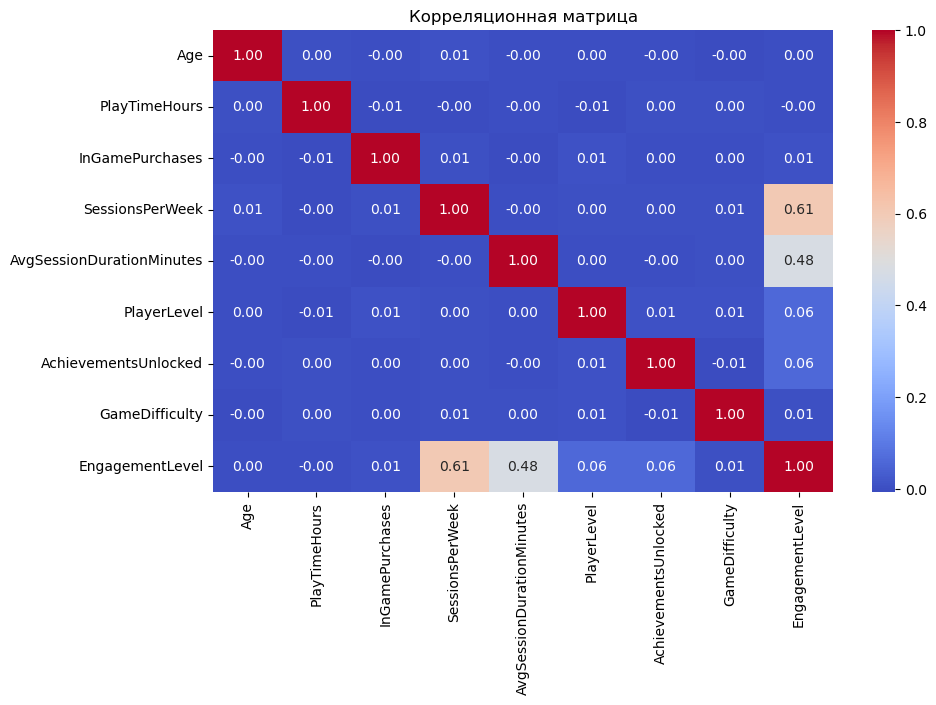

In [52]:
# 1. Корреляционная матрица
correlation_matrix = data.corr()
print("Корреляционная матрица:")
display(correlation_matrix)

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица")
plt.show()

#### Мера адекватности выборки KMO

**Описание:** Тест KMO измеряет, насколько хорошо корреляции между
переменными подходят для факторного анализа. Он основан на
соотношении частичных корреляций к полным корреляциям. Высокие
значения KMO указывают на пригодность данных для анализа.

**Интерпретация значений:**
- KMO > 0.8: отличная адекватность
- 0.7 < KMO ≤ 0.8: хорошая адекватность
- 0.5 < KMO ≤ 0.7: приемлемая адекватность
- KMO ≤ 0.5: данные не подходят для анализа.

In [54]:
kmo_all, kmo_model = calculate_kmo(data)
print(f"KMO = {kmo_model:.3f}")

KMO = 0.365


#### Тест сферичности Бартлетта

**Описание:** Тест Бартлетта проверяет гипотезу о том, что корреляционная
матрица является единичной, что указывает на отсутствие значимых
корреляций между переменными. Если корреляции между переменными
значимы, нулевая гипотеза отвергается, и данные считаются пригодными
для факторного анализа.

**Интерпретация результатов:**
- Если p < 0.05, то нулевая гипотеза отвергается, что указывает на
наличие значимых корреляций.
- Если p > 0.05, данные не имеют значимых корреляций, и факторный
анализ нецелесообразен.

In [27]:
# Проведение теста Бартлетта
chi_square_value, p_value = calculate_bartlett_sphericity(data)

print(f"Chi-square value: {chi_square_value}")
print(f"P-value: {p_value}")

Chi-square value: 36858.84298494878
P-value: 0.0


#### Размер выборки

**Рекомендация:** Обычно для проведения факторного анализа
рекомендуется иметь не менее 5-10 наблюдений на каждую переменную.
Недостаточный размер выборки может привести к нестабильным
результатам.

In [31]:
num_variables = data.shape[1] 
num_observations = data.shape[0]

print(f"Количество переменных: {num_variables}")
print(f"Количество наблюдений: {num_observations}")
print(f"Наблюдений на переменную: {num_observations / num_variables}")

Количество переменных: 9
Количество наблюдений: 40034
Наблюдений на переменную: 4448.222222222223


#### Вывод

In [36]:
if kmo_model > 0.5 and p_value < 0.05:
    print("Данные пригодны для факторного анализа.")
else:
    print("Данные не соответствуют требованиям для факторного анализа.")


Данные не соответствуют требованиям для факторного анализа.
